<a href="https://colab.research.google.com/github/wvirany/stat_learning/blob/residuals/regression/auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression and Model Selection

---

Walter Virany

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Reading in Auto data (used from ISL w/ Python)

Auto = pd.read_csv("Auto.csv",
                   na_values=['?'])

Auto.dropna(inplace=True)   # Drop columns with '?' representing NaN

In [ ]:
X = Auto['horsepower']
X = np.array(X).reshape(-1,1) # The LinearRegression from sklearn expects a 2D array for X, so I reshape here
y = Auto['mpg']

In [ ]:
# Splitting our data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

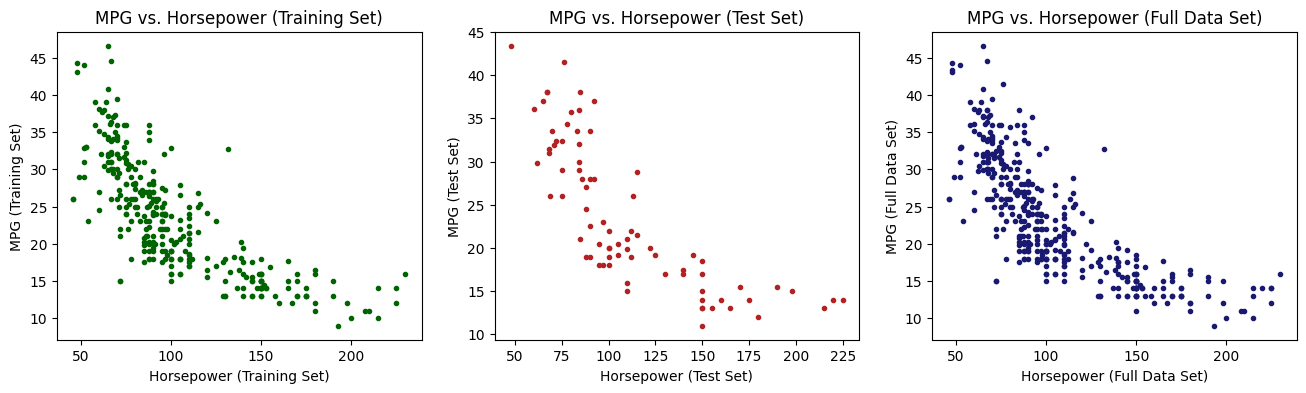

In [ ]:
# It's always a good idea to plot the data first

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

axes[0].scatter(X_train, y_train, marker='.', c='darkgreen')
axes[0].set_xlabel('Horsepower (Training Set)')
axes[0].set_ylabel("MPG (Training Set)")
axes[0].set_title("MPG vs. Horsepower (Training Set)");

axes[1].scatter(X_test, y_test, marker='.', c='firebrick')
axes[1].set_xlabel('Horsepower (Test Set)')
axes[1].set_ylabel("MPG (Test Set)")
axes[1].set_title("MPG vs. Horsepower (Test Set)");

axes[2].scatter(X, y, marker='.', c='midnightblue')
axes[2].set_xlabel('Horsepower (Full Data Set)')
axes[2].set_ylabel("MPG (Full Data Set)")
axes[2].set_title("MPG vs. Horsepower (Full Data Set)");

Let's start by trying a linear model:

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train);

In [ ]:
y_pred = model.predict(X_test)

print("Linear Coefficient:", model.coef_[0], model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R squared:", r2_score(y_test, y_pred))

Linear Coefficient: -0.15790917943623595 39.65769978880898
Mean Squared Error: 28.66013202298904
R squared: 0.5865667722428769


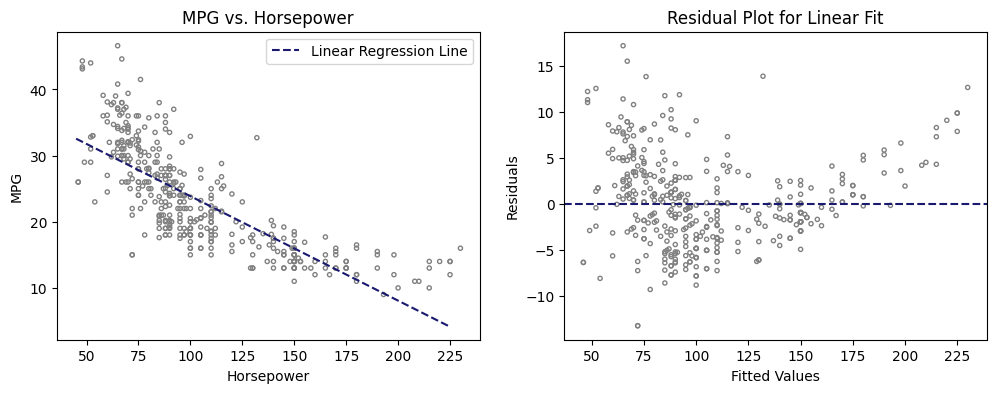

In [63]:
x_seq = np.arange(45, 225)
y_seq = x_seq * model.coef_[0] + model.intercept_
y_i = model.predict(X)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

axes[0].scatter(X, y, marker='.', facecolors='none', edgecolors='grey')
axes[0].plot(x_seq, y_seq, linestyle='dashed', c='midnightblue', label='Linear Regression Line')
axes[0].set_xlabel('Horsepower')
axes[0].set_ylabel('MPG')
axes[0].set_title('MPG vs. Horsepower')
axes[0].legend();

axes[1].scatter(X, (y-y_i), marker='.', facecolors='none', edgecolors='grey')
axes[1].axhline(linestyle='dashed', c='midnightblue')
axes[1].set_xlabel('Fitted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot for Linear Fit');

So, it seems like there could be a nonlinear relationship. Let's try a new model, with the assumption:

$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2^2
$$

This is still a linear regression model, in which we transform our original predictors, with $X_1 =$ `horsepower` and $X_2 =$ `horsepower`$^2$. So, I use the `PolynomialFeatures()` method to transform the feature vector $X$ into a 2D Vandermonde matrix.

In [64]:
# Transforming our features:

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features_train = poly.fit_transform(X_train)
poly_features_test = poly.fit_transform(X_test)
poly_features = poly.fit_transform(X)

# Fitting the model:

poly_model = LinearRegression()
poly_model.fit(poly_features_train, y_train);

In [65]:
y_pred_poly = poly_model.predict(poly_features_test)

print("Coefficients:", poly_model.coef_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_poly))
print("R squared:", r2_score(y_test, y_pred_poly))

Coefficients: [-0.44807547  0.00117254]
Mean Squared Error: 21.396565697839275
R squared: 0.6913464595250509


Seems like a better result! Let's take a look at the visualizations.

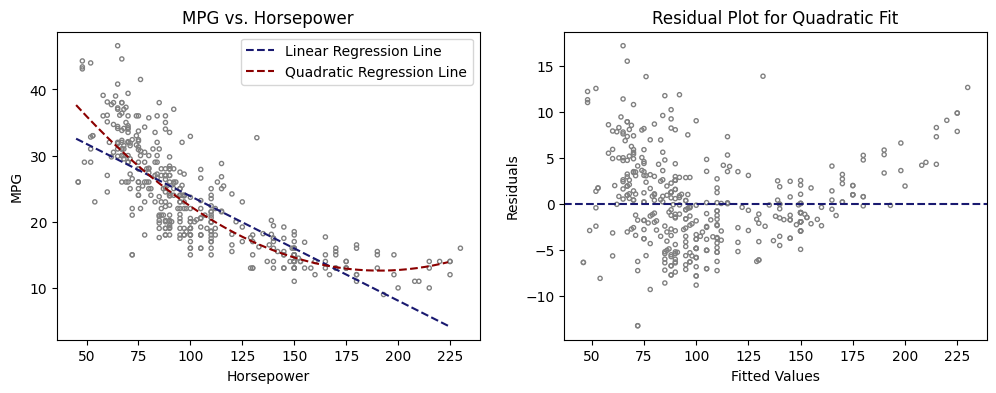

In [66]:
poly_seq = poly_model.coef_[1] * x_seq**2 + poly_model.coef_[0] * x_seq + poly_model.intercept_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

axes[0].scatter(X, y, marker='.', facecolor='none', edgecolor='grey')
axes[0].plot(x_seq, y_seq, linestyle='dashed', c='midnightblue', label='Linear Regression Line')
axes[0].plot(x_seq, poly_seq, linestyle='dashed', c='darkred', label='Quadratic Regression Line')
axes[0].set_xlabel('Horsepower')
axes[0].set_ylabel('MPG')
axes[0].set_title('MPG vs. Horsepower')
axes[0].legend()

axes[1].scatter(X, (y-y_i), marker='.', facecolors='none', edgecolors='grey')
axes[1].axhline(linestyle='dashed', c='midnightblue')
axes[1].set_xlabel('Fitted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot for Quadratic Fit');

It looks like the polynomial regression model for `mpg` on `horsepower` is much more accurate. The natural question to ask now is, would a cubic regression model be better?